# import os 


Path to the directory where the original dataset is present

In [ ]:
import os, shutil
original_dataset_dir_no = 'D:\\Deep learning\\Bain tumor\\wetransfer-de0898\\DataSets of MR\\No Tumor' 
original_dataset_dir_yes = 'D:\\Deep learning\\Bain tumor\\wetransfer-de0898\\DataSets of MR\\Yes Tumor'

Directory where you’ll store your original dataset

In [ ]:
base_dir = 'D:\Deep learning\Bain tumor\wetransfer-de0898\DataSets03'
os.mkdir(base_dir)

Directories for the training, validation, and test splits

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Directory with training no tumor pictures

In [ ]:
train_no_dir = os.path.join(train_dir, 'no_tumor')
os.mkdir(train_no_dir)

Directory with training yes tumor pictures

In [ ]:
train_yes_dir = os.path.join(train_dir, 'yes_tumor')
os.mkdir(train_yes_dir)

Directory with validation no tumor pictures

In [ ]:
validation_no_dir = os.path.join(validation_dir, 'no_tumor')
os.mkdir(validation_no_dir)

Directory with validation yes tumor pictures

In [ ]:
validation_yes_dir = os.path.join(validation_dir, 'yes_tumor')
os.mkdir(validation_yes_dir)

Directory with test no tumor pictures

In [ ]:
test_no_dir = os.path.join(test_dir, 'no_tumor')
os.mkdir(test_no_dir)

Directory with test yes tumor pictures

In [ ]:
test_yes_dir = os.path.join(test_dir, 'yes_tumor')
os.mkdir(test_yes_dir)

Copies the first 4999 no tumor images to train_no_dir

In [ ]:
fnames = ['img_{}.jpg'.format(i) for i in range(1,5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no, fname)
    dst = os.path.join(train_no_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500 no tumor images to validation_no_dir

In [ ]:
fnames = ['img_{}.jpg'.format(i) for i in range(5000, 5500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no, fname)
    dst = os.path.join(validation_no_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 750 no tumor images to test_no_dir

In [ ]:
fnames = ['img_{}.jpg'.format(i) for i in range(5500, 6150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no, fname)
    dst = os.path.join(test_no_dir, fname)
    shutil.copyfile(src, dst)

Copies the first 4999 yes tumor images to train_yes_dir

In [ ]:
fnames = ['img_{}.jpg'.format(i) for i in range(1,4500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_yes, fname)
    dst = os.path.join(train_yes_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500 yes tumor images to validation_yes_dir

In [ ]:
fnames = ['img_{}.jpg'.format(i) for i in range(4500, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_yes, fname)
    dst = os.path.join(validation_yes_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500 yes tumor images to test_yes_dir

In [1]:
fnames = ['img_{}.jpg'.format(i) for i in range(5000, 5500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_yes, fname)
    dst = os.path.join(test_yes_dir, fname)
    shutil.copyfile(src, dst)

# Import VGG16

Fine Tuning of VGG16 Use weights='imagenet , Exclude Top Layers

In [2]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))
conv_base.summary()

# pass three arguments to the constructor:
#  weights specifies the weight checkpoint from which to initialize the model.
#  include_top refers to including (or not) the densely connected classifier on
# top of the network. By default, this densely connected classifier corresponds to
# the 1,000 classes from ImageNet. Because you intend to use your own densely
# connected classifier (with only two classes: yes tumor and no tumor), you don’t need to
# include it.
#  input_shape is the shape of the image tensors that you’ll feed to the network.
# This argument is purely optional: if you don’t pass it, the network will be able to
# process inputs of any size.
# Here’s the detail of the architecture of the VGG16 convolutional base. It’s similar to
# the simple convnets you’re already familiar with:

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Make Hybird Model with fine tuning By Adding Flatten,Dropout and Dense In VGG16 And Compile Model With 'binary_crossentropy'

In [3]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
NUM_CLASSES = 1
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


Import EarlyStopping and ModelCheckpoint call backs

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback for earlystopping Monitors the model’s val_loss and ModelCheckpoint Monitors the model’s val_acc

In [5]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience= 5)

checkpoint = ModelCheckpoint('BrainTumor_Model.h5', monitor='val_acc', 
                            verbose=1, save_best_only=True, mode='max')

Using ImageDataGenerator to read images from directories

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Rescales all images by 1/255

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Give Train directory,  Resizes all images to 224 × 224,  Batch Size = 20  and  using class_mode = binary (Because you use binary_crossentropy loss, you need binary labels.)

In [7]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(224, 224),
batch_size=20,
class_mode='binary')

Found 9498 images belonging to 2 classes.


Give Validation directory, Resizes all images to 224 × 224, Batch Size = 20 and using class_mode = binary (Because you use binary_crossentropy loss, you need binary labels.)

In [8]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(224, 224),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


Fitting the model using a batch generator 

In [9]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=100,
validation_data=validation_generator,
validation_steps=25,
callbacks = [early_stop,checkpoint]
)

Epoch 1/100
 9/10 [==========================>...] - ETA: 51s - loss: 0.7554 - acc: 0.5500 
Epoch 00001: val_acc improved from -inf to 0.74600, saving model to BrainTumor_Model.hdf5
10/10 [==============================] - 897s 90s/step - loss: 0.7474 - acc: 0.5550 - val_loss: 0.5815 - val_acc: 0.7460
Epoch 2/100
 9/10 [==========================>...] - ETA: 51s - loss: 0.6447 - acc: 0.5778 
Epoch 00002: val_acc did not improve from 0.74600
10/10 [==============================] - 899s 90s/step - loss: 0.6492 - acc: 0.5800 - val_loss: 0.5569 - val_acc: 0.7060
Epoch 3/100
 9/10 [==========================>...] - ETA: 52s - loss: 0.5884 - acc: 0.6722 
Epoch 00003: val_acc improved from 0.74600 to 0.82200, saving model to BrainTumor_Model.hdf5
10/10 [==============================] - 902s 90s/step - loss: 0.5887 - acc: 0.6600 - val_loss: 0.4902 - val_acc: 0.8220
Epoch 4/100
 9/10 [==========================>...] - ETA: 52s - loss: 0.5330 - acc: 0.7500 
Epoch 00004: val_acc improved from 0

Epoch 30/100
 9/10 [==========================>...] - ETA: 50s - loss: 0.3967 - acc: 0.7833 
Epoch 00030: val_acc did not improve from 0.97400
10/10 [==============================] - 876s 88s/step - loss: 0.3801 - acc: 0.7950 - val_loss: 0.1764 - val_acc: 0.9580
Epoch 31/100
 9/10 [==========================>...] - ETA: 50s - loss: 0.2969 - acc: 0.8944 
Epoch 00031: val_acc improved from 0.97400 to 0.98000, saving model to BrainTumor_Model.hdf5
10/10 [==============================] - 876s 88s/step - loss: 0.3122 - acc: 0.8800 - val_loss: 0.1415 - val_acc: 0.9800
Epoch 32/100
 9/10 [==========================>...] - ETA: 50s - loss: 0.2914 - acc: 0.8833 
Epoch 00032: val_acc did not improve from 0.98000
10/10 [==============================] - 877s 88s/step - loss: 0.2824 - acc: 0.8900 - val_loss: 0.1430 - val_acc: 0.9780
Epoch 33/100
 9/10 [==========================>...] - ETA: 51s - loss: 0.2640 - acc: 0.9167 
Epoch 00033: val_acc did not improve from 0.98000
10/10 [===============

# Diagnostic plot

Displaying curves of loss and accuracy during training

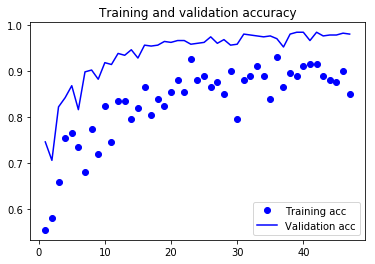

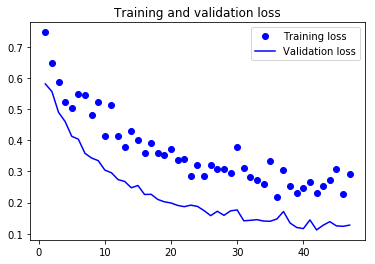

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Save Model

In [11]:
model.save("BrainTumorProject.h5")

Give Test directory, Resizes all images to 224 × 224, Batch Size = 20 and using class_mode = binary (Because you use binary_crossentropy loss, you need binary labels.)

In [13]:
test_generator = train_datagen.flow_from_directory(
test_dir,
target_size=(224, 224),
batch_size=20,
class_mode='binary')


Found 1150 images belonging to 2 classes.


Test The Model On Unseen Data

In [14]:
evaluation = model.evaluate_generator(test_generator, verbose=2) 

58/58 - 936s - loss: 0.1841 - acc: 0.9452
